In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import math
import sklearn.metrics
from scipy.stats import pearsonr, spearmanr

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('ddG_10ns_10traj.csv',delimiter=',')
print (data)
df = pd.read_csv('ddG_10ns_10traj.csv', sep=',', header=None, skiprows =1,usecols=[2,3,4,5,6,7,8],  names=["vdW", "eel", "epb","npl","disp","dG_th","dG_exp"])
print (df)


    vi             mut   vdW   eel   epb   npl  disp  dG_th  dG_exp
0    1   TROP-Y5H-ECCR -1.66 -0.07  1.93  0.02  0.11   0.33    0.12
1    2   TROP-A8V-ECCR  0.85 -3.58  2.00  0.00 -0.16  -0.89   -0.10
2    3  TROP-F20Q-ECCR  4.59 -8.44  2.42 -0.01 -0.25  -1.68   -0.41
3    4  TROP-A23Q-ECCR  4.40 -7.62  2.09 -0.01 -0.26  -1.41   -1.03
4    5  TROP-L29Q-ECCR  3.23 -5.24  1.79 -0.01 -0.30  -0.53   -0.33
5    6  TROP-A31S-ECCR -1.46 -0.04  1.09  0.01  0.06  -0.34   -0.37
6    7  TROP-S37G-ECCR  3.44 -5.78  2.43 -0.01 -0.29  -0.21   -0.11
7    8  TROP-E40A-ECCR -0.70  2.19 -0.43  0.02 -0.09   1.00    0.69
8    9  TROP-V44Q-ECCR  2.32 -4.32  0.82 -0.01 -0.26  -1.45   -1.63
9   10  TROP-M45Q-ECCR  1.91 -5.08  2.45  0.00 -0.26  -0.99   -0.90
10  11  TROP-L48Q-ECCR  3.26 -5.36  1.77 -0.01 -0.30  -0.65   -1.07
11  12  TROP-Q50R-ECCR  3.13 -3.71 -0.35 -0.01 -0.26  -1.20   -0.75
12  13  TROP-L57Q-ECCR -6.50  9.00 -2.46  0.26  0.39   0.68    0.57
13  14  TROP-E59D-ECCR -2.80  2.51 -0.13  0.01  

ddG_th  [[ 1.   -1.66 -0.07  1.93  0.02  0.11]
 [ 1.    0.85 -3.58  2.    0.   -0.16]
 [ 1.    4.59 -8.44  2.42 -0.01 -0.25]
 [ 1.    4.4  -7.62  2.09 -0.01 -0.26]
 [ 1.    3.23 -5.24  1.79 -0.01 -0.3 ]
 [ 1.   -1.46 -0.04  1.09  0.01  0.06]
 [ 1.    3.44 -5.78  2.43 -0.01 -0.29]
 [ 1.   -0.7   2.19 -0.43  0.02 -0.09]
 [ 1.    2.32 -4.32  0.82 -0.01 -0.26]
 [ 1.    1.91 -5.08  2.45  0.   -0.26]
 [ 1.    3.26 -5.36  1.77 -0.01 -0.3 ]
 [ 1.    3.13 -3.71 -0.35 -0.01 -0.26]
 [ 1.   -6.5   9.   -2.46  0.26  0.39]
 [ 1.   -2.8   2.51 -0.13  0.01  0.26]
 [ 1.    3.02 -2.88  0.01 -0.01 -0.28]
 [ 1.   -1.11  5.21 -3.07  0.1  -0.14]
 [ 1.   -2.34  9.51 -5.97  0.03 -0.06]
 [ 1.    2.12  4.31 -5.54 -0.01 -0.29]
 [ 1.   -2.79  1.86  2.08  0.12  0.02]
 [ 1.    2.44 -1.22 -1.75 -0.01 -0.28]
 [ 1.   -2.27  2.59 -0.64  0.03  0.08]
 [ 1.    1.76 -4.25  1.78 -0.01 -0.25]
 [ 1.   -0.57  2.22 -1.43  0.01 -0.07]
 [ 1.   -2.52 -0.46  3.04  0.03  0.09]]
                            OLS Regression Results     

/tmp/ipykernel_105788/3116817345.py:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m" (-> color=(0.75, 0.0, 0.75, 1)). The keyword argument will take precedence.
  plt.plot(ddG_mod, m*ddG_mod+c, 'm', linewidth=3,color='darkcyan',)


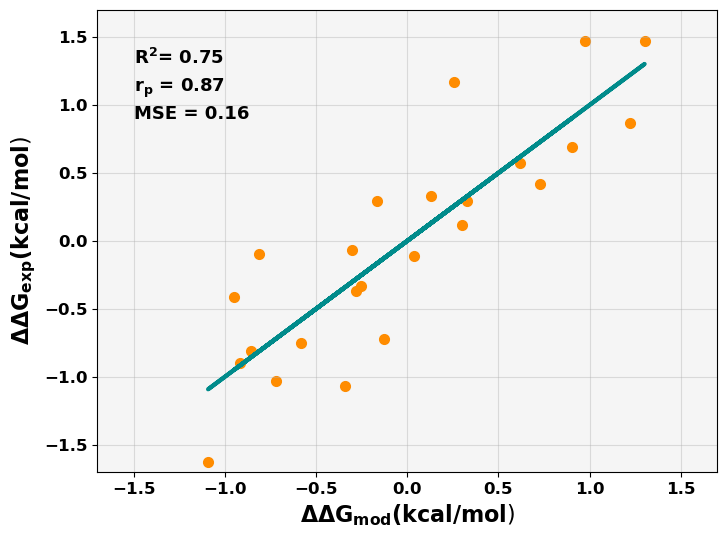

In [2]:
E_VDW = data['vdW']
E_EEL = data['eel']
E_PB = data['epb']
E_CAV = data['npl']
E_dis = data['disp']
#E_NP = E_CAV + E_dis
ddG_ex = data['dG_exp']
n = len(ddG_ex)
ddG_th1 = np.column_stack((E_VDW,E_EEL,E_PB,E_CAV,E_dis))
ddG_th = sm.add_constant(ddG_th1)
print ("ddG_th ",ddG_th)
est = sm.OLS(ddG_ex,ddG_th)
print (est)
est2 = est.fit()
print(est2.summary())
a = est2.params
ddG_mod = a[0] + a[1]*E_VDW + a[2]*E_EEL + a[3]*E_PB + a[4]*E_CAV + a[5]*E_dis
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(ddG_mod, ddG_ex)

m,c = np.polyfit(ddG_mod, ddG_ex, 1)
print(m,c)
plt.plot(ddG_mod, m*ddG_mod+c,'m')

mse = sklearn.metrics.mean_squared_error(ddG_ex, ddG_mod)
rmse = math.sqrt(mse)
print("MSE between actual and predicted values", mse)

# Calculate r2 score
r2 = r2_score(ddG_ex, ddG_mod)

print("The difference between actual and predicted values (RMSE):", rmse)
print("The R-squared value:", r2)

Sr2,Sp2 = spearmanr(ddG_ex,ddG_mod)
Pr2,Pp2 = pearsonr(ddG_ex,ddG_mod)
print("Pearson's  correlation coefficient = ",Pr2)
print("Spearman's correlation coefficient = ",Sr2)

plt.plot(ddG_mod, m*ddG_mod+c, 'm', linewidth=3,color='darkcyan',)
plt.scatter(ddG_mod, ddG_ex, color='darkorange', linewidths=2)
plt.text(-1.5, 0.9, r'MSE = %.2f'%(mse),fontsize=13, fontweight='bold')
plt.text(-1.5, 1.1, r'$\mathbf{r_{p}}$ = %.2f'%(Pr2), fontsize=13,fontweight='bold', )
#plt.text(-0.75, 1.8, 'RMSE = %.2f'%(rmse),fontsize=13, fontweight='bold',)
plt.text(-1.5, 1.3, r'$\mathbf{R^{2}}$= %.2f'%(r2),fontsize=13, fontweight='bold',)

plt.ylabel(r'$\mathbf{\Delta \Delta G_{exp}(kcal/mol})$',fontsize=16,fontweight='bold')
plt.xlabel(r'$\mathbf{\Delta \Delta G_{mod}(kcal/mol})$',fontsize=16,fontweight='bold')
plt.xticks( fontsize=10,fontweight='bold')
plt.yticks( fontsize=10,fontweight='bold')

plt.tick_params(labelsize=12)
ax = plt.subplot(111)
ax.set_facecolor('whitesmoke',)
ax.grid(alpha=0.4)
ax.set_ylim(-1.7, 1.7)
ax.set_xlim(-1.7, 1.7)
plt.rcParams['axes.facecolor'] = 'whitesmoke'
#plt.tight_layout()
plt.savefig('regression_model.png', dpi=2000)
plt.savefig('regression_model.pdf', format='pdf')
plt.show()